<a href="https://colab.research.google.com/github/Rithwik001/Renewable-Energy-Usage-Analysis/blob/main/Renewable_Energy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Title-26: Renewable Energy Usage Analysis**

### **Objective:**  
Analyze the adoption of renewable energy sources across regions.

### **Dataset:**  
`renewable_energy.csv`  
Columns:  
`region, year, solar_kwh, wind_kwh, hydro_kwh, total_consumption`


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [7]:
try:
    df = pd.read_csv('renewable_energy.csv')
    print("File loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: 'renewable_energy.csv' not found. Please upload the file to your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


,region,year,solar_kwh,wind_kwh,hydro_kwh,total_consumption
0,North,2020,1500,1200,800,5000
1,South,2020,1300,1000,950,4800
2,East,2020,900,700,600,4200
3,West,2020,1100,950,850,4500
4,North,2021,1600,1300,900,5200


### **Handle Missing Renewable Values (Forward Fill)**

In [8]:
df[['solar_kwh', 'wind_kwh', 'hydro_kwh']] = df[['solar_kwh', 'wind_kwh', 'hydro_kwh']].ffill()

print("Missing values in solar_kwh, wind_kwh, and hydro_kwh handled using forward fill.")

Missing values in solar_kwh, wind_kwh, and hydro_kwh handled using forward fill.


## **Q1: Calculate total renewable contribution by region. [CO1, BL3]**

In [9]:
df['total_renewable'] = df['solar_kwh'] + df['wind_kwh'] + df['hydro_kwh']
region_contribution = df.groupby('region')['total_renewable'].sum().reset_index()
print(region_contribution)



  region  total_renewable
0   East             4520
1  North             7300
2  South             6670
3   West             5970


## **Q2: Compare solar vs wind usage across years. [CO2, BL4]**

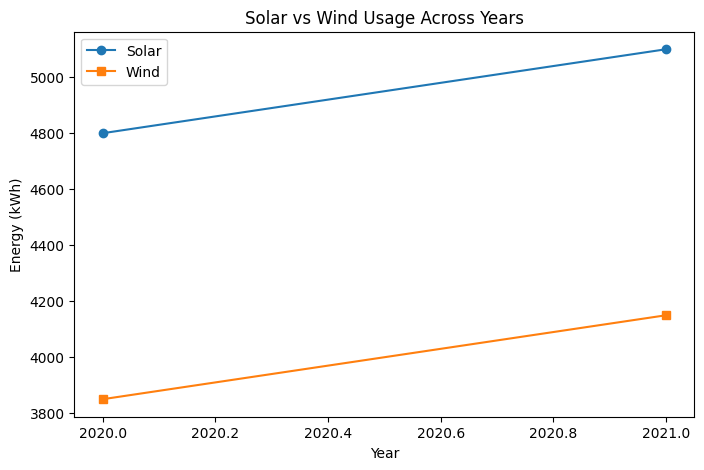

In [10]:
solar_wind = df.groupby('year')[['solar_kwh', 'wind_kwh']].sum().reset_index()
plt.figure(figsize=(8,5))
plt.plot(solar_wind['year'], solar_wind['solar_kwh'], marker='o', label='Solar')
plt.plot(solar_wind['year'], solar_wind['wind_kwh'], marker='s', label='Wind')
plt.xlabel('Year')
plt.ylabel('Energy (kWh)')
plt.title('Solar vs Wind Usage Across Years')
plt.legend()
plt.show()

## **Q3: Impute missing hydro_kwh with mean. [CO3, BL3]**

In [11]:
df.fillna({'hydro_kwh': df['hydro_kwh'].mean()}, inplace=True)

print('Missing values handled successfully.')

Missing values handled successfully.


## **Q4: Analyze correlation between renewable usage and total_consumption. [CO4, BL4]**

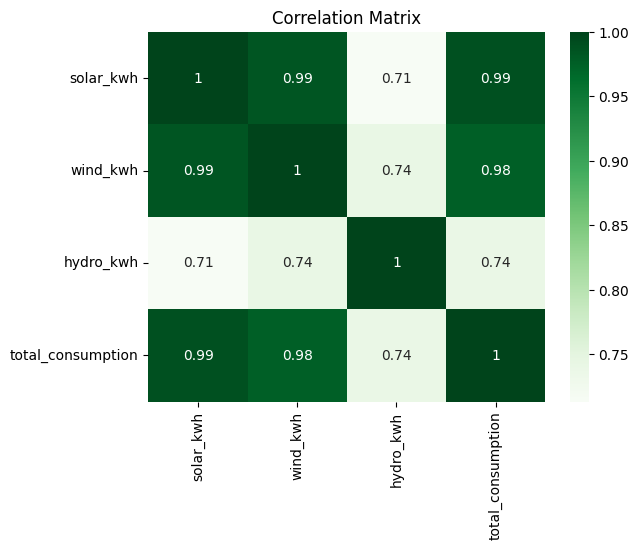

In [12]:
corr = df[['solar_kwh', 'wind_kwh', 'hydro_kwh', 'total_consumption']].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

## **Q5: Create stacked bar plots and trend lines. [CO5, BL5]**

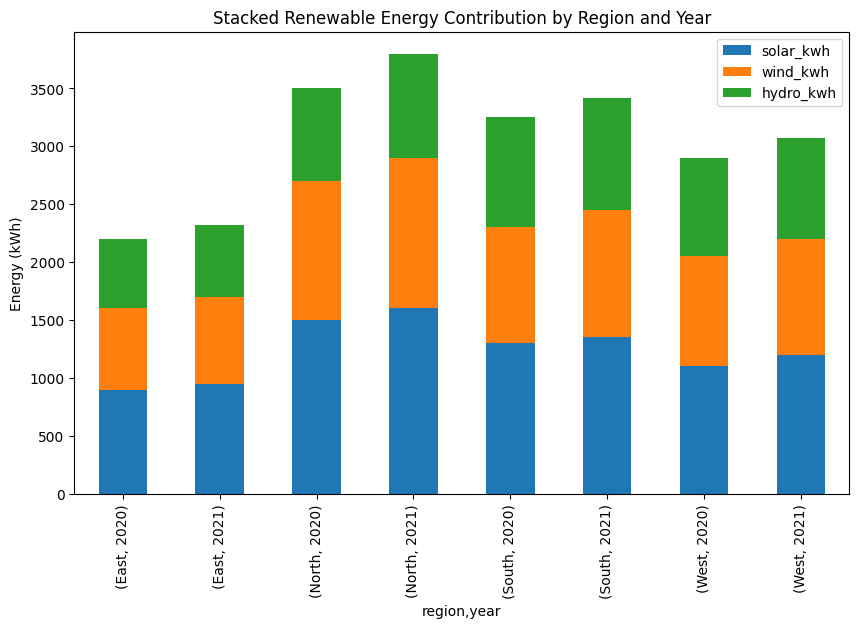

/tmp/ipython-input-898185412.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='total_renewable', data=df, estimator='sum', ci=None)


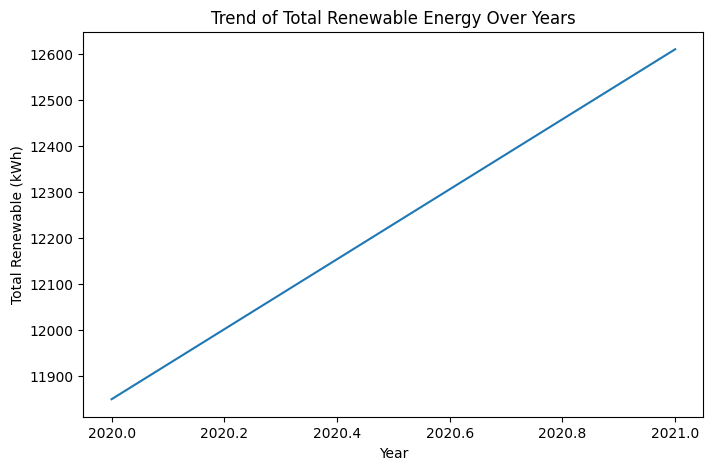

In [13]:
region_year = df.groupby(['region', 'year'])[['solar_kwh', 'wind_kwh', 'hydro_kwh']].sum().reset_index()
region_year.set_index(['region', 'year'], inplace=True)
region_year.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Renewable Energy Contribution by Region and Year')
plt.ylabel('Energy (kWh)')
plt.show()

# Trend line for total renewable
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='total_renewable', data=df, estimator='sum', ci=None)
plt.title('Trend of Total Renewable Energy Over Years')
plt.xlabel('Year')
plt.ylabel('Total Renewable (kWh)')
plt.show()